In [1]:
import pandas as pd
import os
import numpy as np 

In [98]:
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('1000_lemmatized.csv')
df.head() 

,reviews,lowercase_reviews,clean_reviews,reviews_sw_removed,reviews_wo_freq,stemmed_reviews,lemmatized_reviews,n_gram_reviews
0,"I admit, the great majority of films released ...","i admit, the great majority of films released ...",i admit the great majority of films released b...,admit great majority films released say 1933 d...,admit majority films released say 1933 dozen m...,admit major film releas say 1933 dozen major s...,admit major film releas say 1933 dozen major s...,"[['admit', 'major', 'film'], ['major', 'film',..."
1,"Take a low budget, inexperienced actors doubli...","take a low budget, inexperienced actors doubli...",take a low budget inexperienced actors doublin...,take low budget inexperienced actors doubling ...,take low budget inexperienced actors doubling ...,take low budget inexperienc actor doubl produc...,take low budget inexperienc actor doubl produc...,"[['take', 'low', 'budget'], ['low', 'budget', ..."
2,"Everybody has seen 'Back To The Future,' right...","everybody has seen 'back to the future,' right...",everybody has seen back to the future right wh...,everybody seen back future right whether like ...,everybody seen back future right whether youve...,everybodi seen back futur right whether youv s...,everybodi seen back futur right whether youv s...,"[['everybodi', 'seen', 'back'], ['seen', 'back..."
3,Doris Day was an icon of beauty in singing and...,doris day was an icon of beauty in singing and...,doris day was an icon of beauty in singing and...,doris day icon beauty singing acting warm voic...,doris day icon beauty singing acting warm voic...,dori day icon beauti sing act warm voic geniu ...,dori day icon beauti sing act warm voic geniu ...,"[['dori', 'day', 'icon'], ['day', 'icon', 'bea..."
4,"After a series of silly, fun-loving movies, 19...","after a series of silly, fun-loving movies, 19...",after a series of silly funloving movies 1955 ...,series silly funloving movies 1955 big year do...,series silly funloving movies 1955 big year do...,seri silli funlov movi 1955 big year dori day ...,seri silli funlov movi 1955 big year dori day ...,"[['seri', 'silli', 'funlov'], ['silli', 'funlo..."


## Tokenization

- splitting raw text into small chunks of words or sentences
- text to words : word tokenizer
- text to sentences : sentence tokenizer
  

In [3]:
from nltk.tokenize import word_tokenize 

temp_text = df["lemmatized_reviews"][0]

In [4]:
print(temp_text) 

admit major film releas say 1933 dozen major silent view love crowd two last command citi light latter chaplin circa 1931br apprehens humor often difficult appreci uh enjoy decad later lead actor thought littl filmbr intrigu sequenc earli guy suppos get delous three minut fulli dress schtick background perhap three dozen men pas nake white black wwi butt part full backsid shown earli variat beefcak courtesi howard hugh


In [5]:
import keras 
import tensorflow as tf 
import keras.preprocessing

In [42]:
tokens_tf = tf.keras.preprocessing.text.text_to_word_sequence(temp_text) 
tokens_nltk = word_tokenize(temp_text) 

print(f'NLTK tokenizer tokenized as: {tokens_nltk[:20]}\n')
print(f'Keras tokenizer tokenized as: {tokens_tf[:20]}\n')
print(tokens_nltk==tokens_tf) 

NLTK tokenizer tokenized as: ['admit', 'major', 'film', 'releas', 'say', '1933', 'dozen', 'major', 'silent', 'view', 'love', 'crowd', 'two', 'last', 'command', 'citi', 'light', 'latter', 'chaplin', 'circa']

Keras tokenizer tokenized as: ['admit', 'major', 'film', 'releas', 'say', '1933', 'dozen', 'major', 'silent', 'view', 'love', 'crowd', 'two', 'last', 'command', 'citi', 'light', 'latter', 'chaplin', 'circa']

True


In [43]:
# trying for the n-gram reviews 
temp_text2 = df["n_gram_reviews"][0]

tokens_tf = tf.keras.preprocessing.text.text_to_word_sequence(temp_text2) 
tokens_nltk = word_tokenize(temp_text2) 
print(f'NLTK tokenizer tokenized as: {tokens_nltk[:20]}\n')
print(f'Keras tokenizer tokenized as: {tokens_tf[:20]}\n')
print(tokens_nltk==tokens_tf) 

NLTK tokenizer tokenized as: ['[', '[', "'admit", "'", ',', "'major", "'", ',', "'film", "'", ']', ',', '[', "'major", "'", ',', "'film", "'", ',', "'releas"]

Keras tokenizer tokenized as: ["'admit'", "'major'", "'film'", "'major'", "'film'", "'releas'", "'film'", "'releas'", "'say'", "'releas'", "'say'", "'1933'", "'say'", "'1933'", "'dozen'", "'1933'", "'dozen'", "'major'", "'dozen'", "'major'"]

False


## Thus, tokenizer only separates the words. No matter the occurence, all the occurences are counted and displayed. 

In [44]:
df["tokenized_reviews"] = df["lemmatized_reviews"].apply(lambda text:tf.keras.preprocessing.text.text_to_word_sequence(text))
df.head() 

,reviews,lowercase_reviews,clean_reviews,reviews_sw_removed,reviews_wo_freq,stemmed_reviews,lemmatized_reviews,n_gram_reviews,tokenized_reviews
0,"I admit, the great majority of films released ...","i admit, the great majority of films released ...",i admit the great majority of films released b...,admit great majority films released say 1933 d...,admit majority films released say 1933 dozen m...,admit major film releas say 1933 dozen major s...,admit major film releas say 1933 dozen major s...,"[['admit', 'major', 'film'], ['major', 'film',...","[admit, major, film, releas, say, 1933, dozen,..."
1,"Take a low budget, inexperienced actors doubli...","take a low budget, inexperienced actors doubli...",take a low budget inexperienced actors doublin...,take low budget inexperienced actors doubling ...,take low budget inexperienced actors doubling ...,take low budget inexperienc actor doubl produc...,take low budget inexperienc actor doubl produc...,"[['take', 'low', 'budget'], ['low', 'budget', ...","[take, low, budget, inexperienc, actor, doubl,..."
2,"Everybody has seen 'Back To The Future,' right...","everybody has seen 'back to the future,' right...",everybody has seen back to the future right wh...,everybody seen back future right whether like ...,everybody seen back future right whether youve...,everybodi seen back futur right whether youv s...,everybodi seen back futur right whether youv s...,"[['everybodi', 'seen', 'back'], ['seen', 'back...","[everybodi, seen, back, futur, right, whether,..."
3,Doris Day was an icon of beauty in singing and...,doris day was an icon of beauty in singing and...,doris day was an icon of beauty in singing and...,doris day icon beauty singing acting warm voic...,doris day icon beauty singing acting warm voic...,dori day icon beauti sing act warm voic geniu ...,dori day icon beauti sing act warm voic geniu ...,"[['dori', 'day', 'icon'], ['day', 'icon', 'bea...","[dori, day, icon, beauti, sing, act, warm, voi..."
4,"After a series of silly, fun-loving movies, 19...","after a series of silly, fun-loving movies, 19...",after a series of silly funloving movies 1955 ...,series silly funloving movies 1955 big year do...,series silly funloving movies 1955 big year do...,seri silli funlov movi 1955 big year dori day ...,seri silli funlov movi 1955 big year dori day ...,"[['seri', 'silli', 'funlov'], ['silli', 'funlo...","[seri, silli, funlov, movi, 1955, big, year, d..."


# Encoding 

- converting the words into numbers/vectors
    - to preserve context and relationship between words and sentences

## Index-Based Encoding 

- assign unique index to each token in the text 

In [45]:
# getting all the vocabulary from all the reviews 
all_words = [] 
vocab = []
for index, row in df.iterrows():
    all_words.extend(row['tokenized_reviews'])
    for word in row['tokenized_reviews']:
        if(word) not in vocab:
            vocab.append(word) 
print(len(all_words), len(vocab)) 

115169 13430


In [46]:
print(len(all_words)/len(vocab))

8.575502606105733


In [47]:
vocab[34:39] 

['intrigu', 'sequenc', 'earli', 'guy', 'suppos']

In [48]:
# word to index encoding 
word_to_index = {word:index for index, word in enumerate(vocab)} 
# word_to_index.items()[:5] 

## Bag of Words (BOW) 

- describes occurences of words within a document
- only concerned with whether known words occur in the document 

In [49]:
def bow(text):
    # initializing vector of zeros with same length as vocab 
    normal_bow_vector = [0] * len(vocab) 
    binary_bow_vector = [0] * len(vocab)
    words = text.split() 
    for word in words:
        if word in word_to_index:
            #normal bow takes the overall count of the words 
            normal_bow_vector[word_to_index[word]]+=1
            # binary bow changes to 1 if present, 0 if absent 
            binary_bow_vector[word_to_index[word]] = 1
    return normal_bow_vector, binary_bow_vector 

In [50]:
bow("admit major film releas say 1933 dozen major silent butt part full")[0][:5] 

[1, 2, 1, 1, 1]

In [51]:
bow("admit major film releas say 1933 dozen major silent butt part full")[0][-5:]

[0, 0, 0, 0, 0]

In [52]:
# using library 
from sklearn.feature_extraction.text import CountVectorizer

text = "admit major film releas say 1933 dozen major silent butt part full"
vectorizer_normal = CountVectorizer(vocabulary=vocab)
vectorizer_binary = CountVectorizer(vocabulary=vocab, binary=True) 

binary_bow_matrix = vectorizer_binary.fit_transform([text])
normal_bow_matrix = vectorizer_normal.fit_transform([text]) 
print(type(binary_bow_matrix.toarray()), type(binary_bow_matrix.toarray())) 

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [53]:
binary_bow_matrix.shape, binary_bow_matrix.shape 

((1, 13430), (1, 13430))

In [54]:
binary_bow_scratch, normal_bow_scratch = bow(text)
np.array(binary_bow_scratch).shape, binary_bow_matrix.toarray().shape 

((13430,), (1, 13430))

In [55]:
binary_bow_matrix.toarray(), binary_bow_scratch[:5] 

(array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64), [1, 2, 1, 1, 1])

## TF_IDF Encoding

- every word has relative frequency coding with respect to current sentence and whole document
- Term Frequency : occurence of current word in current sentence
    $$ TF = \frac{Number \, of \, times \, word \, appears\, in \, the \, document}{Total\, number\, of\, words\, in\, the\, document} $$

- Inverse Data Frequency : log of total number of words in whole data with respect to total number of sentences containing the current word

$$ IDF = log (\frac {Total\,number\,of\,documents\,in\,the\,corpus}{Number\,of\,documents\,containing\,the\,word}) $$

In [56]:
# without the vocabulary passed to the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

text2 = ["admit major film releas say 1933" ,"dozen major silent butt part full"]

tfidf_vectorizer = TfidfVectorizer() 
tfidf_matrix = tfidf_vectorizer.fit_transform(text2)
print(tfidf_matrix) 
# Stopwords get removed automatically
feature_names = tfidf_vectorizer.get_feature_names_out()

print("feature_names",feature_names)

tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
tfidf_df

  (0, 0)	0.42615959880289433
  (0, 9)	0.42615959880289433
  (0, 8)	0.42615959880289433
  (0, 4)	0.42615959880289433
  (0, 6)	0.3032160644503863
  (0, 1)	0.42615959880289433
  (1, 5)	0.42615959880289433
  (1, 7)	0.42615959880289433
  (1, 2)	0.42615959880289433
  (1, 10)	0.42615959880289433
  (1, 3)	0.42615959880289433
  (1, 6)	0.3032160644503863
feature_names ['1933' 'admit' 'butt' 'dozen' 'film' 'full' 'major' 'part' 'releas' 'say'
 'silent']


,1933,admit,butt,dozen,film,full,major,part,releas,say,silent
0,0.42616,0.42616,0.00000,0.00000,0.42616,0.00000,0.303216,0.00000,0.42616,0.42616,0.00000
1,0.00000,0.00000,0.42616,0.42616,0.00000,0.42616,0.303216,0.42616,0.00000,0.00000,0.42616


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(vocabulary=vocab) 
tfidf_matrix = tfidf_vectorizer.fit_transform([text])

# Stopwords get removed automatically
feature_names = tfidf_vectorizer.get_feature_names_out()

print(text, "feature_names",feature_names)

admit major film releas say 1933 dozen major silent butt part full feature_names ['admit' 'major' 'film' ... 'preconceiv' 'phenom' 'wayyyi']


In [58]:
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
tfidf_df

,admit,major,film,releas,say,1933,dozen,silent,view,love,...,merchant,2br,pube,crossroad,emmenth,vienna,womenbr,preconceiv,phenom,wayyyi
0,0.267261,0.534522,0.267261,0.267261,0.267261,0.267261,0.267261,0.267261,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
print(df.columns)
print(type(df.tokenized_reviews[0]))

Index(['reviews', 'lowercase_reviews', 'clean_reviews', 'reviews_sw_removed',
       'reviews_wo_freq', 'stemmed_reviews', 'lemmatized_reviews',
       'n_gram_reviews', 'tokenized_reviews'],
      dtype='object')
<class 'list'>


In [60]:
# exploring the type of data to use TF-IDF on: 
print(df['tokenized_reviews'][:5],type(df['tokenized_reviews'][5]))
print() 
print(df['lemmatized_reviews'][:5], type(df['lemmatized_reviews'][5]))

0    [admit, major, film, releas, say, 1933, dozen,...
1    [take, low, budget, inexperienc, actor, doubl,...
2    [everybodi, seen, back, futur, right, whether,...
3    [dori, day, icon, beauti, sing, act, warm, voi...
4    [seri, silli, funlov, movi, 1955, big, year, d...
Name: tokenized_reviews, dtype: object <class 'list'>

0    admit major film releas say 1933 dozen major s...
1    take low budget inexperienc actor doubl produc...
2    everybodi seen back futur right whether youv s...
3    dori day icon beauti sing act warm voic geniu ...
4    seri silli funlov movi 1955 big year dori day ...
Name: lemmatized_reviews, dtype: object <class 'str'>


In [61]:
# implementing the TF_IDF for the dataframe 
# tokenized_reviews has list data 
vectorizer_df = TfidfVectorizer(analyzer = lambda x : x)
tfidf_matrix_df = vectorizer_df.fit_transform(df['tokenized_reviews'])
feature_names_df = vectorizer_df.get_feature_names_out() 
print(feature_names_df), print(len(feature_names_df)) 

['010' '04' '1' ... 'í' 'özgür' 'özyagcilarnazli']
13430


(None, None)

In [65]:
# for all the reviews lemmatized for capturing essence 
# lemmatized reviews has string data as long sentences 
vectorizer_df = TfidfVectorizer()
tfidf_lemmatized = vectorizer_df.fit_transform(df['lemmatized_reviews'])
tfidf_transformed = vectorizer_df.transform(df['lemmatized_reviews'])
feature_names_lemmatized = vectorizer_df.get_feature_names_out()
print(f"n_samples {tfidf_transformed.shape[0]}, n_features{tfidf_transformed.shape[1]}")
print(len(feature_names_lemmatized)) 

n_samples 1000, n_features13383
13383


In [92]:
# with tokenized reviews 
vectorizer_df = TfidfVectorizer(analyzer = lambda x : x)
tfidf_tokenized = vectorizer_df.fit_transform(df['tokenized_reviews'])
# tfidf_transformed = vectorizer_df.transform(df['tokenized_reviews'])
feature_names_lemmatized = vectorizer_df.get_feature_names_out()
tfidf_lemmatized_mat = pd.DataFrame(tfidf_tokenized.toarray(), columns = feature_names_lemmatized)
print(f"n_samples {tfidf_transformed.shape[0]}, n_features{tfidf_transformed.shape[1]}")
print(len(feature_names_lemmatized)) 

n_samples 1000, n_features13430
13430


In [93]:
tfidf_lemmatized_mat

,010,04,1,10,100,1000,10000,100th,1010,104,...,zuckerabrahamszuck,aw,,£20,½br,à,çeviknikobut,í,özgür,özyagcilarnazli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
search_word = 'major' 
word_index = np.where(feature_names_lemmatized == search_word)[0]
word_scores = tfidf_lemmatized_mat.iloc[:, word_index]
word_scores 

,major
0,0.206408
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
995,0.000000
996,0.000000
997,0.000000
998,0.000000


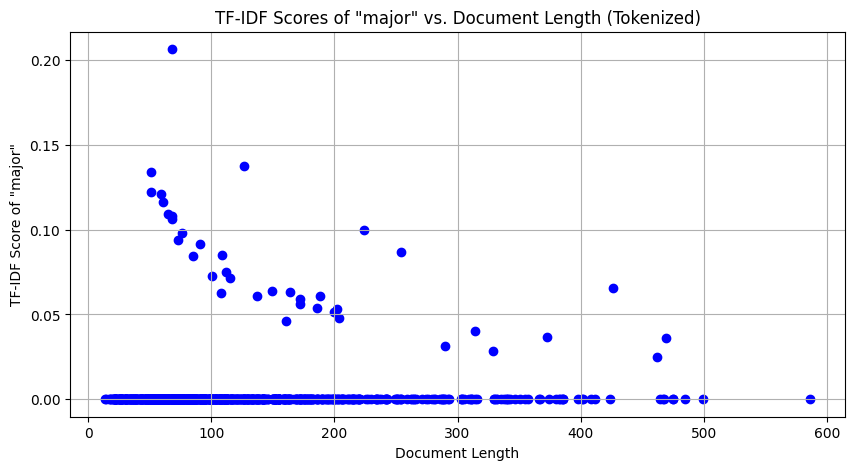

In [122]:
# Plotting TF-IDF scores against document length

document_lengths = df['lemmatized_reviews'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.scatter(document_lengths, word_scores, color='blue')
plt.title(f'TF-IDF Scores of "{search_word}" vs. Document Length (Tokenized)')
plt.xlabel('Document Length')
plt.ylabel(f'TF-IDF Score of "{search_word}"')
plt.grid(True)
plt.show()

In [121]:
tf_scores = tfidf_lemmatized_mat.iloc[:, word_index]  # TF scores
idf_scores = vectorizer_df.idf_[word_index]  # IDF scores
tfidf_scores = tf_scores * idf_scores  # TF-IDF scores
print(tf_scores.shape, idf_scores, tfidf_scores.shape, tfidf_lemmatized_mat.shape)

(1000, 1) [4.24519313] (1000, 1) (1000, 13430)


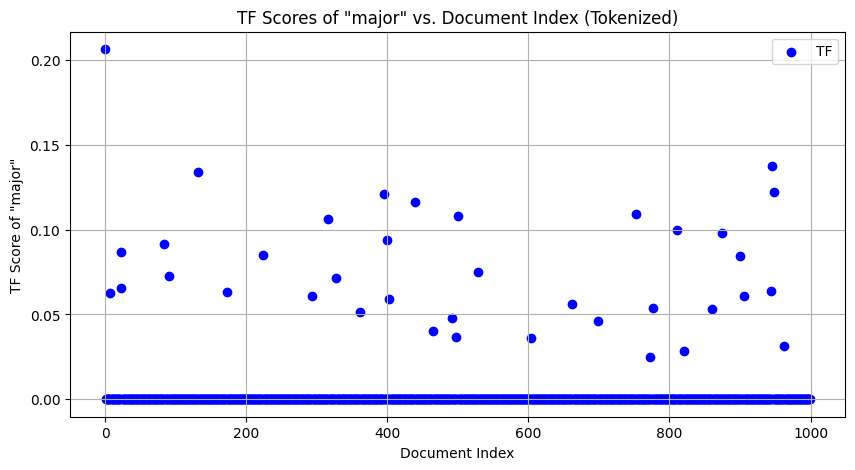

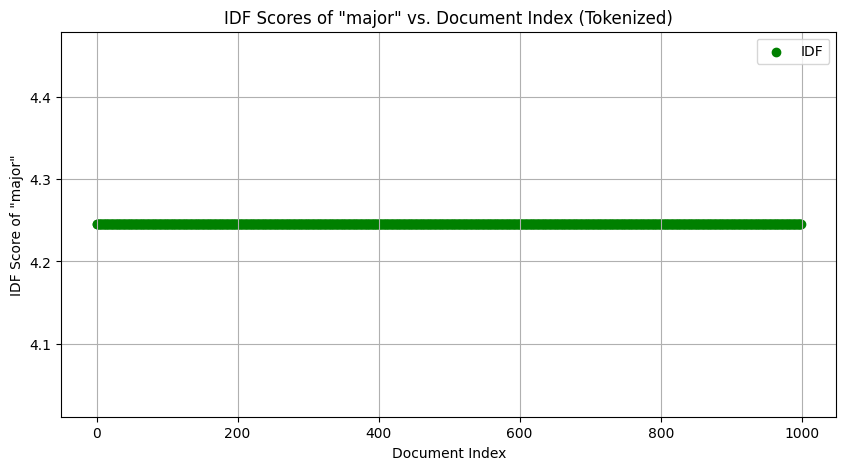

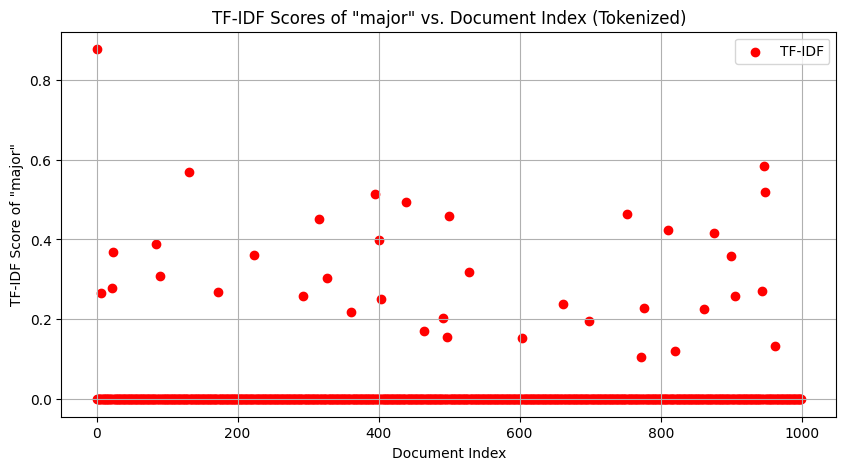

In [128]:
document_index = range(tfidf_lemmatized_mat.shape[0]) 

# Plotting TF scores against document index
plt.figure(figsize=(10, 5))
plt.scatter(document_index[:5000], tf_scores[:5000], color='blue', label='TF')
plt.title(f'TF Scores of "{search_word}" vs. Document Index (Tokenized)')
plt.xlabel('Document Index')
plt.ylabel(f'TF Score of "{search_word}"')
plt.grid(True)
plt.legend()
plt.show()

# Plotting IDF scores against document index
plt.figure(figsize=(10, 5))
plt.scatter(document_index[:5000], idf_scores[:5000] * np.ones(document_length)[:5000], color='green', label='IDF')
plt.title(f'IDF Scores of "{search_word}" vs. Document Index (Tokenized)')
plt.xlabel('Document Index')
plt.ylabel(f'IDF Score of "{search_word}"')
plt.grid(True)
plt.legend()
plt.show()

# Plotting TF-IDF scores against document index
plt.figure(figsize=(10, 5))
plt.scatter(document_index[:5000], tfidf_scores[:5000], color='red', label='TF-IDF')
plt.title(f'TF-IDF Scores of "{search_word}" vs. Document Index (Tokenized)')
plt.xlabel('Document Index')
plt.ylabel(f'TF-IDF Score of "{search_word}"')
plt.grid(True)
plt.legend()
plt.show()

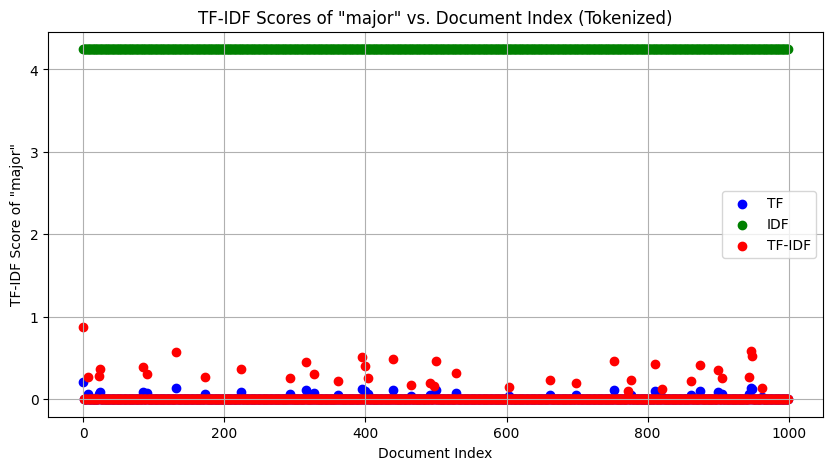

In [127]:
document_index = range(tfidf_lemmatized_mat.shape[0]) 

# Plotting TF scores against document index
plt.figure(figsize=(10, 5))
plt.scatter(document_index[:5000], tf_scores[:5000], color='blue', label='TF')
# plt.title(f'TF Scores of "{search_word}" vs. Document Index (Tokenized)')
# plt.xlabel('Document Index')
# plt.ylabel(f'TF Score of "{search_word}"')
# plt.grid(True)
# plt.legend()
# plt.show()

# Plotting IDF scores against document index
# plt.figure(figsize=(10, 5))
plt.scatter(document_index[:5000], idf_scores[:5000] * np.ones(document_length)[:5000], color='green', label='IDF')
# plt.title(f'IDF Scores of "{search_word}" vs. Document Index (Tokenized)')
# plt.xlabel('Document Index')
# plt.ylabel(f'IDF Score of "{search_word}"')
# plt.grid(True)
# plt.legend()
# plt.show()

# Plotting TF-IDF scores against document index
# plt.figure(figsize=(10, 5))
plt.scatter(document_index[:5000], tfidf_scores[:5000], color='red', label='TF-IDF')
plt.title(f'TF-IDF Scores of "{search_word}" vs. Document Index (Tokenized)')
plt.xlabel('Document Index')
plt.ylabel(f'TF-IDF Score of "{search_word}"')
plt.grid(True)
plt.legend()
plt.show()

In [64]:
def tokenize(text):
    return text.lower().split()

def calculate_tf(text, vocab):
    tf_vector = np.zeros(len(vocab))
    tokens = tokenize(text)
    total_words = len(tokens)
    for word in tokens:
        if word in vocab:
            tf_vector[vocab.index(word)] += 1 / total_words
    return tf_vector

def calculate_idf(docs, vocab):
    idf_vector = np.zeros(len(vocab))
    total_docs = len(docs)
    for word in vocab:
        doc_count = sum(1 for doc in docs if word in doc)
        idf_vector[vocab.index(word)] = np.log(total_docs / (doc_count + 1)) + 1
    return idf_vector

def tfidf_vect(docs):
    all_words = set()
    for doc in docs:
        all_words.update(tokenize(doc))
    vocab = list(all_words)
    
    tf_matrix = np.array([calculate_tf(doc, vocab) for doc in docs])
    idf_vector = calculate_idf(docs, vocab)
    
    tfidf_matrix = tf_matrix * idf_vector
    
    return tfidf_matrix, vocab

tfidf_matrix, vocab = tfidf_vect(text2)
tfidf_df = pd.DataFrame(data=tfidf_matrix)
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.166667,0.099089,0.166667,0.166667,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000
1,0.166667,0.000000,0.099089,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667,0.166667
